In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris


In [74]:

iris_dataset = load_iris(as_frame=True)
iris= iris_dataset.frame
iris.shape
x = iris.drop('target',axis=1)

In [27]:
# Normalize the data - Find Mean, Variance, then scale it
x_mean = x.mean()
print("Mean:\n",x_mean)

x_std = x.std()
print("Standard Deviation:\n",x_std)

z = (x-x_mean)/x_std    

Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


Covariance matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


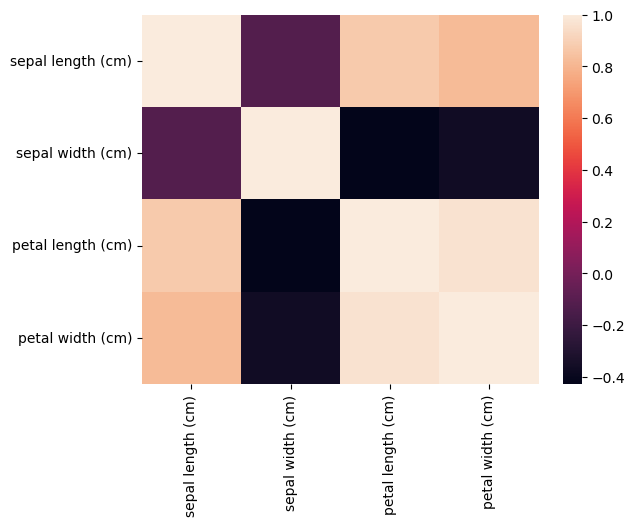

In [31]:

# Finding covariance to get the eigen values and vectors ( Which basically are the variance of each dimension )

c = z.cov()
print("Covariance matrix:\n",c)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(c)
plt.show()

In [50]:
# Finding the holy grail - Eigen values , Eigen vectors

eigenvalues , eigenvectors = np.linalg.eig(c)
print("Eigen Values : ", eigenvalues)
print("Eigen Vectors : ",eigenvectors)

Eigen Values :  [2.91849782 0.91403047 0.14675688 0.02071484]
Eigen Vectors :  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [53]:
# Sorting the eigens in decreasing order of eigen values

idx = eigenvalues.argsort()[::-1]  # [ start : stop : STEP ] since step is -1, it is decreasing
print(idx)

[0 1 2 3]


In [54]:
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]

print([(eigenvalues[i],eigenvectors[i]) for i in range(len(eigenvalues))])

[(2.918497816531995, array([ 0.52106591, -0.37741762, -0.71956635,  0.26128628])), (0.9140304714680706, array([-0.26934744, -0.92329566,  0.24438178, -0.12350962])), (0.1467568755713148, array([ 0.5804131 , -0.02449161,  0.14212637, -0.80144925])), (0.020714836428618662, array([ 0.56485654, -0.06694199,  0.63427274,  0.52359713]))]


In [67]:
n_components = 2
u = eigenvectors[:,:n_components]
u

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [75]:
pca_component = pd.DataFrame( u ,
                             index= iris_dataset['feature_names'],
                             columns=['PC1','PC2']
                             ) 

<Axes: >

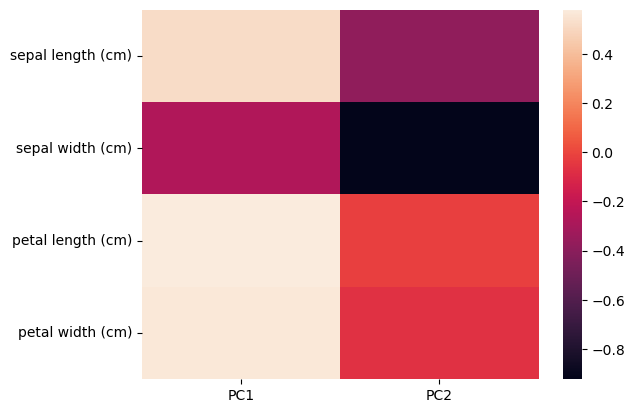

In [78]:
sns.heatmap(pca_component) # Just for visualization

In [ ]:
# Matrix multiplication or dot Product
Z_pca = z @ pca_component

# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values

# Z_pca['target'] = iris_dataset['target']
print(Z_pca)

         PCA1      PCA2
0   -2.257141 -0.478424
1   -2.074013  0.671883
2   -2.356335  0.340766
3   -2.291707  0.595400
4   -2.381863 -0.644676
..        ...       ...
145  1.864258 -0.385674
146  1.559356  0.893693
147  1.516091 -0.268171
148  1.368204 -1.007878
149  0.957448  0.024250

[150 rows x 2 columns]


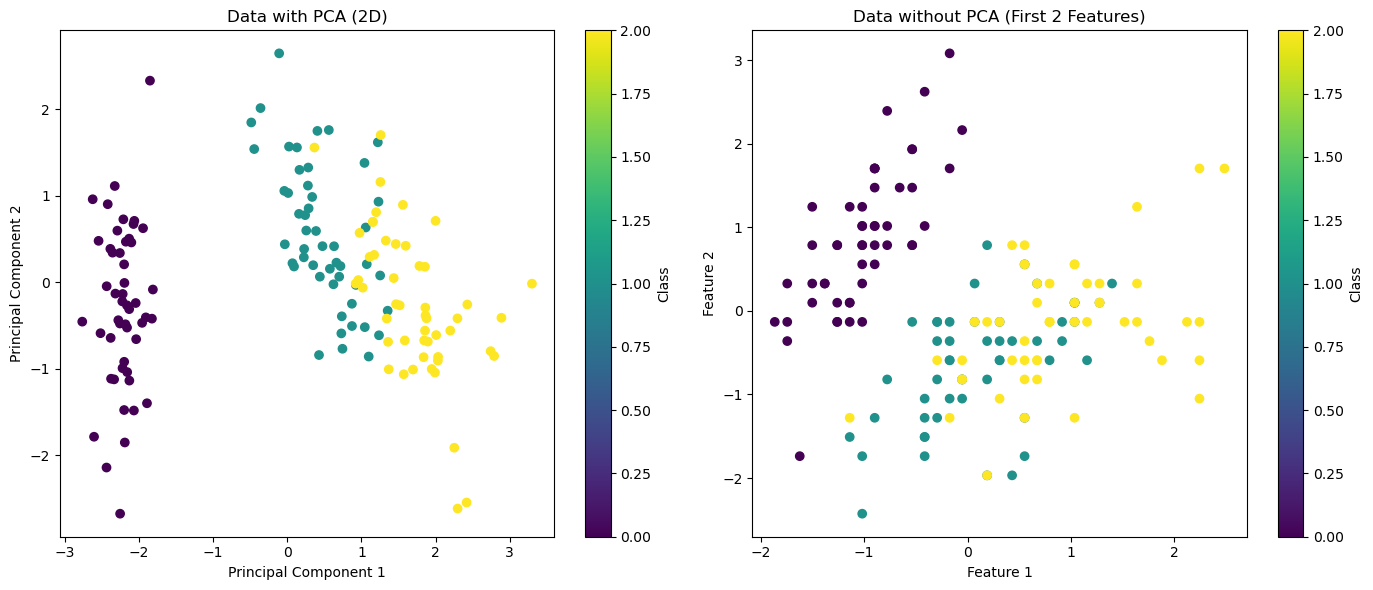

In [ ]:
    Z_pca = np.array(Z_pca)
    plt.figure(figsize=(14, 6))
    z = np.array(z)

    # Scatter plot of PCA-reduced data
    plt.subplot(1, 2, 1)
    plt.scatter(Z_pca[:, 0], Z_pca[:, 1], c=iris_dataset['target'], cmap='viridis')
    plt.title('Data with PCA (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class')

    # 2. Visualization of the dataset without PCA (using first two features)
    plt.subplot(1, 2, 2)
    plt.scatter(z[:, 0], z[:, 1], c=iris_dataset['target'], cmap='viridis')
    plt.title('Data without PCA (First 2 Features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Class')

    plt.tight_layout()
    plt.show()